#Linear Algebra

## 1.1 Graph vector $\vec{a}$ 

\begin{align}
\vec{a} = \begin{bmatrix} 3 \\ 2 \end{bmatrix}
\end{align}

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

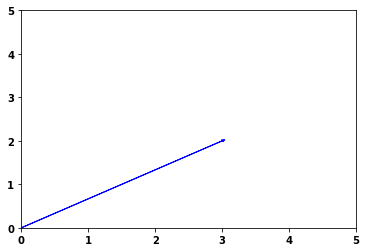

In [4]:
a = [3, 2]

plt.arrow(0, 0, a[0], a[1], head_width=0.05, head_length=0.05, color='blue')
plt.xlim(0, 5)
plt.ylim(0, 5)
plt.show()

## 1.2 Find $||\vec{b}||$. What does the norm of a vector represent?
\begin{align}
\vec{b} = \begin{bmatrix} 17 & -4 & -2 & 1\end{bmatrix}
\end{align}


In [5]:
b = [17, -4, -2, 1]

norm_b = np.linalg.norm(b)
print(norm_b)

17.60681686165901


## 1.3 Find $\vec{c} \cdot \vec{d}$

\begin{align}
\vec{c} = \begin{bmatrix}3 & 7 & -2 & 12\end{bmatrix}
\qquad
\vec{d} = \begin{bmatrix}9 & -7 & 4 & 6\end{bmatrix}
\end{align}

In [6]:
c = [3, 7, -2, 12]
d = [9, -7, 4, 6]

np.dot(c, d)

42

## 1.4 Find $E^{-1}$ and $E^{T}$

\begin{align}
E = 
\begin{bmatrix}
    7 & 4 & 2 \\
    1 & 3 & -1 \\
    2 & 6 & -4
\end{bmatrix}
\end{align}

In [9]:
E = [[7, 4, 2],
    [1, 3, -1],
    [2, 6, -4]]

E_T = np.transpose(E)
E_inv = np.linalg.inv(E)

print('Transpose of E:\n', E_T)
print('\nInverse of E:\n', E_inv)

Transpose of E:
 [[ 7  1  2]
 [ 4  3  6]
 [ 2 -1 -4]]

Inverse of E:
 [[ 0.17647059 -0.82352941  0.29411765]
 [-0.05882353  0.94117647 -0.26470588]
 [ 0.          1.         -0.5       ]]


# Intermediate Linear Algebra

## 2.1 Suppose that the number of customers at a ski resort as well as the number of inches of fresh powder (snow)  was recorded for 7 days. 

### Customers: [820, 760, 1250, 990, 1080, 1450, 1600]

### Inches of new snow: [0, 1, 7, 1, 0, 6, 4 ]

## Find the mean, variance, and standard deviation for both the number of customers and inches of new snow for the week. You may use library functions, dataframes, .describe(), etc. 



In [11]:
import pandas as pd

customers = [820, 760, 1250, 990, 1080, 1450, 1600]
snow = [0, 1, 7, 1, 0, 6, 4]

df = pd.DataFrame({'customers': customers, 'snow': snow})

df.head()

,customers,snow
0,820,0
1,760,1
2,1250,7
3,990,1
4,1080,0


In [12]:
df.describe()

,customers,snow
count,7.000000,7.000000
mean,1135.714286,2.714286
std,314.264069,2.927700
min,760.000000,0.000000
25%,905.000000,0.500000
50%,1080.000000,1.000000
75%,1350.000000,5.000000
max,1600.000000,7.000000


In [13]:
np.var(df)

customers    84653.061224
snow             7.346939
dtype: float64

## 2.2 Are the variances of the number of customers and inches of snow comparable? 
## Why or why not? 

### No, variance shows the spread of the data points from the mean, but we need the standard deviation to compare the 2 variables.

## 2.3 Find the variance-covariance matrix for the number of customers and inches of snow at the ski resort. 

In [16]:
df.cov()

,customers,snow
customers,98761.904762,670.238095
snow,670.238095,8.571429


# PCA

## 3.1 Standardize the data so that it has a mean of 0 and a standard deviation of 1. (You may use library functions)

We have included some code to get you started so that you don't get stuck on something that isn't standardizing the data or PCA.

This might be helpful:

<https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html>

In [32]:
# Let me get you some data to start you off.
import pandas as pd

data = {"Country": ["England","Wales","Scotland","North Ireland"], 
        "Cheese": [105,103,103,66], 
        "Carcass_Meat": [245,227,242,267], 
        "Other_Meat": [685, 803, 750, 586], 
        "Fish": [147, 160, 122, 93], 
        "Fats_and_Oils": [193, 235, 184, 209], 
        "Sugars": [156, 175, 147, 139], 
        "Fresh_Potatoes": [720, 874, 566, 1033], 
        "Fresh_Veg": [253, 265, 171, 143], 
        "Other_Veg": [488, 570, 418, 355], 
        "Processed_Potatoes": [198, 203, 220, 187], 
        "Processed_Veg": [360, 365, 337, 334], 
        "Fresh_Fruit": [1102, 1137, 957, 674], 
        "Cereals": [1472, 1582, 1462, 1494], 
        "Beverages": [57,73,53,47], 
        "Soft_Drinks": [1374, 1256, 1572, 1506], 
        "Alcoholic Drinks": [375, 475, 458, 135], 
        "Confectionery": [54, 64, 62, 41]}

df = pd.DataFrame(data)

# Look at the data
df.head()

,Country,Cheese,Carcass_Meat,Other_Meat,Fish,Fats_and_Oils,Sugars,Fresh_Potatoes,Fresh_Veg,Other_Veg,Processed_Potatoes,Processed_Veg,Fresh_Fruit,Cereals,Beverages,Soft_Drinks,Alcoholic Drinks,Confectionery
0,England,105,245,685,147,193,156,720,253,488,198,360,1102,1472,57,1374,375,54
1,Wales,103,227,803,160,235,175,874,265,570,203,365,1137,1582,73,1256,475,64
2,Scotland,103,242,750,122,184,147,566,171,418,220,337,957,1462,53,1572,458,62
3,North Ireland,66,267,586,93,209,139,1033,143,355,187,334,674,1494,47,1506,135,41


In [33]:
# Setting Country to index so data can be standardized
df = df.set_index('Country')
print(df.shape)
df.head()

(4, 17)


,Cheese,Carcass_Meat,Other_Meat,Fish,Fats_and_Oils,Sugars,Fresh_Potatoes,Fresh_Veg,Other_Veg,Processed_Potatoes,Processed_Veg,Fresh_Fruit,Cereals,Beverages,Soft_Drinks,Alcoholic Drinks,Confectionery
Country,,,,,,,,,,,,,,,,,
England,105,245,685,147,193,156,720,253,488,198,360,1102,1472,57,1374,375,54
Wales,103,227,803,160,235,175,874,265,570,203,365,1137,1582,73,1256,475,64
Scotland,103,242,750,122,184,147,566,171,418,220,337,957,1462,53,1572,458,62
North Ireland,66,267,586,93,209,139,1033,143,355,187,334,674,1494,47,1506,135,41


In [34]:
from sklearn.preprocessing import StandardScaler

df_norm = StandardScaler().fit_transform(df)
df_norm

C:\Users\theta\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\theta\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


array([[ 0.65827466, -0.01749546, -0.25954622,  0.64458535, -0.63242919,
         0.13055067, -0.45007561,  0.86331183,  0.37773603, -0.33626508,
         0.80547723,  0.73740709, -0.64432226, -0.05191741, -0.43523112,
         0.10499766, -0.13830319],
       [ 0.53580495, -1.27716878,  1.19885635,  1.15244047,  1.53589947,
         1.54795798,  0.43569619,  1.09352832,  1.40168163,  0.08406627,
         1.17160324,  0.9292974 ,  1.67946294,  1.60943981, -1.40423624,
         0.84182336,  0.96812236],
       [ 0.53580495, -0.22744102,  0.54381113, -0.33205912, -1.09707105,
        -0.54085279, -1.33584741, -0.70983418, -0.49636387,  1.51319287,
        -0.87870243, -0.0575671 , -0.85557546, -0.46725672,  1.19072664,
         0.71656299,  0.74683725],
       [-1.72988456,  1.52210526, -1.48312126, -1.4649667 ,  0.19360077,
        -1.13765587,  1.35022682, -1.24700598, -1.28305378, -1.26099406,
        -1.09837804, -1.60913739, -0.17956522, -1.09026568,  0.64874072,
        -1.66338402

## 3.2 Perform PCA on the data and graph Principal Component 1 against Principal Component 2. (You may use library functions)

This might be helpful:

<https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html>

In [35]:
from sklearn.decomposition import PCA

# create PCA instance
pca = PCA(n_components=2)

# fit the data
pca.fit(df_norm)

# transform the data
B = pca.transform(df_norm)
print(B)

# create new dataframe
pca_df = pd.DataFrame(B)
pca_df.head()

[[-0.95448984  0.32831832]
 [-4.52095094 -1.73537967]
 [ 0.48797835  3.23367195]
 [ 4.98746242 -1.8266106 ]]


,0,1
0,-0.954490,0.328318
1,-4.520951,-1.735380
2,0.487978,3.233672
3,4.987462,-1.826611


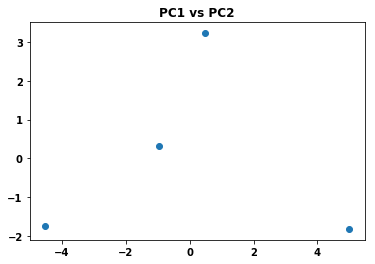

In [36]:
plt.scatter(pca_df[0], pca_df[1])
plt.title('PC1 vs PC2')
plt.show()

# Clustering

## 4.1 Use K-Means to cluster the following data and then graph your results. (You may use library functions)

We have included some code to get you started so that you don't get stuck on something that isn't standardizing clustering.

Prioritize calculating the clusters over graphing them. 

Scikit-Learn K-Means Documentation:

<https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html>

In [54]:
points = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/points.csv')
points.head()

,x,y
0,-7.846803,-3.421277
1,-3.554323,-6.884729
2,-0.192822,-9.671030
3,-6.401456,-5.223972
4,-0.804026,-9.704457


In [55]:
# standaradize the data
points_norm = StandardScaler().fit_transform(points)

print(points_norm)

[[-1.21526379e+00  2.86037188e-04]
 [-2.70846217e-01 -6.21863006e-01]
 [ 4.68740475e-01 -1.12237346e+00]
 [-8.97263139e-01 -3.23536806e-01]
 [ 3.34265444e-01 -1.12837792e+00]
 [-5.83901585e-01 -4.87876229e-01]
 [-1.27514964e+00 -3.61493204e-02]
 [-1.28101065e+00  1.14052055e-01]
 [-2.74000332e-01  1.58519487e+00]
 [-7.45507361e-01 -6.07004467e-01]
 [-3.70236546e-01 -8.21276183e-01]
 [-4.45252599e-01 -6.55731775e-01]
 [ 5.16199687e-01 -1.28425299e+00]
 [-5.12658923e-01 -8.40267708e-01]
 [-1.30684890e+00 -1.69198224e-01]
 [ 1.17498591e-01 -1.37830766e+00]
 [-1.15366593e+00 -1.74027100e-01]
 [-1.49353728e-01 -4.15974917e-01]
 [-5.57611813e-02 -7.92066494e-01]
 [ 1.99420407e+00  1.35805442e+00]
 [-1.24151228e+00  4.90205302e-02]
 [ 1.88969493e+00  1.51541391e+00]
 [ 1.89400952e+00  1.41370075e+00]
 [ 1.92043381e+00  1.40233100e+00]
 [-7.97113881e-02 -9.14291591e-01]
 [-6.51190075e-01 -1.06321676e+00]
 [ 5.26779895e-01 -1.20189377e+00]
 [ 1.50223553e-01  1.33386379e+00]
 [-5.02389343e-01 -8

In [56]:
# create pca instance
pca = PCA(n_components=2)

# fit the data 
pca.fit(points_norm)

# transform the data
df_pca_trans = pd.DataFrame(pca.transform(points_norm))

df_pca_trans.head()

,0,1
0,-0.859119,-0.859524
1,-0.631241,0.248206
2,-0.462188,1.125087
3,-0.863236,-0.405686
4,-0.561522,1.034245


In [57]:
from sklearn.cluster import KMeans

# cluster data
kmeans = KMeans(n_clusters=4)
kmeans.fit(df_pca_trans)
labels = kmeans.labels_

print(labels)

[0 2 2 0 2 2 0 0 3 2 2 2 2 2 0 2 0 2 2 1 0 1 1 1 2 2 2 3 2 2 2 2 2 1 2 2 2
 2 3 2 2 1 3 3 3 2 2 2 0 2 1 0 0 3 1 2 2 3 3 0 1 2 0 3 1 3 1 3 0 3 2 2 2 2
 1 1 2 2 3 1 3 2 2 2 3 2 3 2 2 1 3 2 1 2 2 2 2 2 2 2 2 2 0 2 2 1 0 0 0 1 2
 1 2 0 2 2 3 3 1 3 1 2 2 0 2 0 2 1 3 0 2 0 2 0 3 3 2 1 0 2 3 2 2 1 2 3 2 3
 0 2 2 2 0 1 2 3 2 1 2 0 2 2 3 0 1 1 2 3 2 2 0 2 3 1 2 2 2 2 2 0 2 2 2 2 2
 2 0 1 3 2 2 0 1 0 2 3 1 1 2 2]


In [58]:
# add cluster labels to dataframe
df_pca_trans['clusters'] = labels
df_pca_trans.head()

,0,1,clusters
0,-0.859119,-0.859524,0
1,-0.631241,0.248206,2
2,-0.462188,1.125087,2
3,-0.863236,-0.405686,0
4,-0.561522,1.034245,2


In [59]:
# rename colums for plotting
df_pca_trans = df_pca_trans.rename(columns={0: 'x', 1: 'y'})
df_pca_trans.head()

,x,y,clusters
0,-0.859119,-0.859524,0
1,-0.631241,0.248206,2
2,-0.462188,1.125087,2
3,-0.863236,-0.405686,0
4,-0.561522,1.034245,2


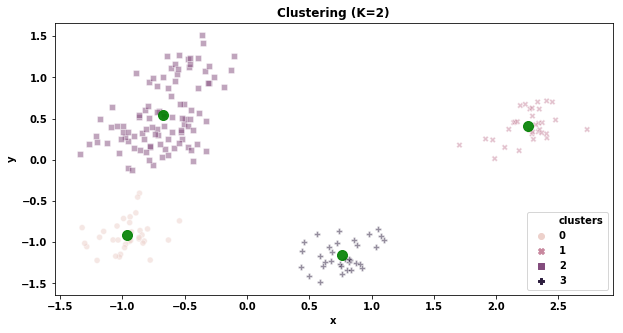

In [60]:
import seaborn as sns

# plot results
fig, ax = plt.subplots(figsize=(10, 5))
sns.scatterplot(ax=ax, x='x', y='y', data=df_pca_trans, hue='clusters', style='clusters', alpha=0.5, legend='full')

ax.set_title('Clustering (K=2)')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='green', s=100, alpha=0.9);

plt.show()